<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>SVM, Kernel Trick (практика)</center></h2>

**Срок сдачи:** 24 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 24 апреля, -4 балла после 06:00 1 мая, -6 баллов после 06:00 8 мая

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import grid_search
from sklearn import cross_validation
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

C:\Users\Guest\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Guest\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Семинарская часть

Функция `select_model` принимает на вход обучающую выборку и возвращает модель (машину опорных векторов) с наилучшими параметрами для данной выборки. Эту функцию нужно реализовать.

Подбираемые параметры подели включают в себя:
- различные функции ядра (линейное, RBF, полиномиальные разных степеней)
- различные значения константы $C$ ($0.1, 1, 10, 100, 1000, 10000$)

Подбирать параметры необходимо с помощью 10-fold кросс-валидации. Сейчас в качестве заглушки функция всегда возвращает линейный SVC.

In [2]:
def select_model(x, y):
    """
    Implement some model selection strategy here:
    seek through different kernels and parameters.

    Use a validation scheme to select the best model
    
    Quality metric: accuracy

    Returns:
        SVM classifier implemented by sklearn SVC class.
    """
    
    model = SVC()
    param_grid = [
        {
            'C' : [0.1,1,10,100,1000,100000,0.1,1,10,100,1000,10000],
            'kernel' : ['linear', 'poly', 'rbf'],
        },
        {
            'C' : [0.1,1,10,100,1000,100000,0.1,1,10,100,1000,10000],
            'kernel' : ['poly'],
            'degree' : [2,3],
        },
    ]
        
    
    grid_cv = grid_search.GridSearchCV(model, param_grid).fit(x,y)
    

    print "Trying model {}".format(model)

    print "Best model %s, with accuracy %f" % (grid_cv.best_estimator_, grid_cv.best_score_)
    return grid_cv.best_estimator_

Далее две вспомогательные функции, которые отображают данные и разделяющую поверхность

In [3]:
def plot_data_set(x, y, description=''):
    print "Plotting data set points"
    plt.figure(figsize=(8, 8))

    colors = np.array(['r', 'b'])[y]
    plt.title(description, fontsize='small')
    plt.scatter(x[:, 0], x[:, 1], marker='o', c=colors, s=50)
    
def plot_decision_region(x1_min, x2_min, x1_max, x2_max, clf, n_points=1000):
    print "Plotting decision region"
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n_points), np.linspace(x2_min, x2_max, n_points))
    z = clf.decision_function(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

    plt.contour(x1, x2, z, levels=[0.0], linestyles='solid', linewidths=2.0)
    plt.contour(x1, x2, z, levels=[-1.0, 1.0], linestyles='dashed', linewidths=1.0)

Generating 'Linearly-separated' data set
Trying model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best model SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.920000
Plotting data set points
Plotting decision region


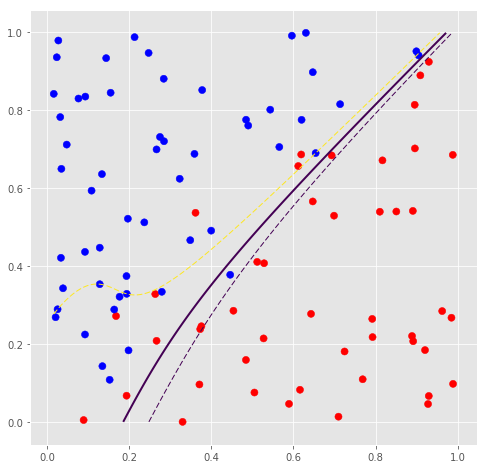

In [4]:
def generate_linear(size=100, k=1.1, b=0.0, nl=0.1):
    print "Generating 'Linearly-separated' data set"

    x = np.random.random((size, 2))
    y = np.zeros(size, dtype=int)
    noise = np.random.randn(size) * nl
    y[x[:, 1] - (k * x[:, 0] + b) > noise] = 1

    return x, y

x, y = generate_linear()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Concentric circles' data set
Trying model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best model SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.950000
Plotting data set points
Plotting decision region


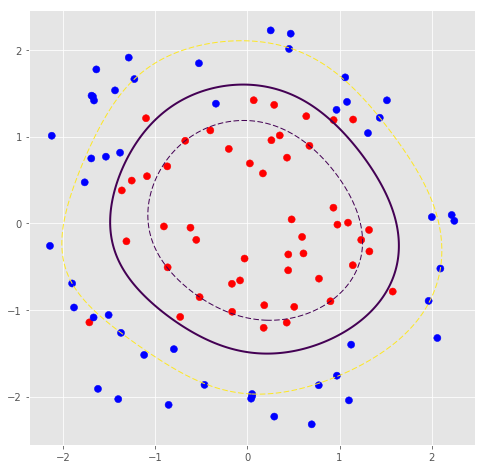

In [5]:
def generate_concentric(size=100, r1=1.0, r2=2.0, sigma=0.3):
    print "Generating 'Concentric circles' data set"
    x = np.zeros((size, 2))
    x[:size/2, 0] = sigma * np.random.randn(size/2) + r1
    x[size/2:, 0] = sigma * np.random.randn(size/2) + r2
    x[:, 1] = (np.random.random(size) - 0.5) * 2 * np.pi
    y = np.hstack([np.zeros(size/2, dtype=int), np.ones(size/2, dtype=int)])

    z = np.zeros((size, 2))
    z[:, 0] = x[:, 0] * np.cos(x[:, 1])
    z[:, 1] = x[:, 0] * np.sin(x[:, 1])

    return z, y

x, y = generate_concentric()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Sinus-separated' data set
Trying model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best model SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.930000
Plotting data set points
Plotting decision region


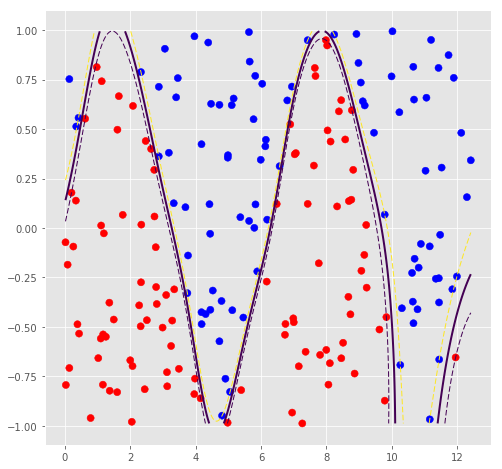

In [6]:
def generate_sin(size=200):
    print "Generating 'Sinus-separated' data set"

    x = np.random.random((size, 2))
    x[:, 0] = x[:, 0] * 4 * np.pi
    x[:, 1] = (x[:, 1] - 0.5) * 2
    y = np.zeros(size, dtype=int)
    y[x[:, 1] > np.sin(x[:, 0])] = 1

    return x, y

x, y = generate_sin()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

# Регрессия с SVM (3 балла)

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (z-score) и выведите их на графике.

In [7]:
from scipy import stats

In [8]:
data = pd.read_csv('titanium.csv')
data.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


In [9]:
X = stats.zscore(np.array(data)[:,0])
X = X.reshape(-1,1)
X

array([[-1.69705627],
       [-1.6263456 ],
       [-1.55563492],
       [-1.48492424],
       [-1.41421356],
       [-1.34350288],
       [-1.27279221],
       [-1.20208153],
       [-1.13137085],
       [-1.06066017],
       [-0.98994949],
       [-0.91923882],
       [-0.84852814],
       [-0.77781746],
       [-0.70710678],
       [-0.6363961 ],
       [-0.56568542],
       [-0.49497475],
       [-0.42426407],
       [-0.35355339],
       [-0.28284271],
       [-0.21213203],
       [-0.14142136],
       [-0.07071068],
       [ 0.        ],
       [ 0.07071068],
       [ 0.14142136],
       [ 0.21213203],
       [ 0.28284271],
       [ 0.35355339],
       [ 0.42426407],
       [ 0.49497475],
       [ 0.56568542],
       [ 0.6363961 ],
       [ 0.70710678],
       [ 0.77781746],
       [ 0.84852814],
       [ 0.91923882],
       [ 0.98994949],
       [ 1.06066017],
       [ 1.13137085],
       [ 1.20208153],
       [ 1.27279221],
       [ 1.34350288],
       [ 1.41421356],
       [ 1

In [10]:
y = np.array(data)[:,1]
y

array([ 0.644,  0.622,  0.638,  0.649,  0.652,  0.639,  0.646,  0.657,
        0.652,  0.655,  0.644,  0.663,  0.663,  0.668,  0.676,  0.676,
        0.686,  0.679,  0.678,  0.683,  0.694,  0.699,  0.71 ,  0.73 ,
        0.763,  0.812,  0.907,  1.044,  1.336,  1.881,  2.169,  2.075,
        1.598,  1.211,  0.916,  0.746,  0.672,  0.627,  0.615,  0.607,
        0.606,  0.609,  0.603,  0.601,  0.603,  0.601,  0.611,  0.601,
        0.608])

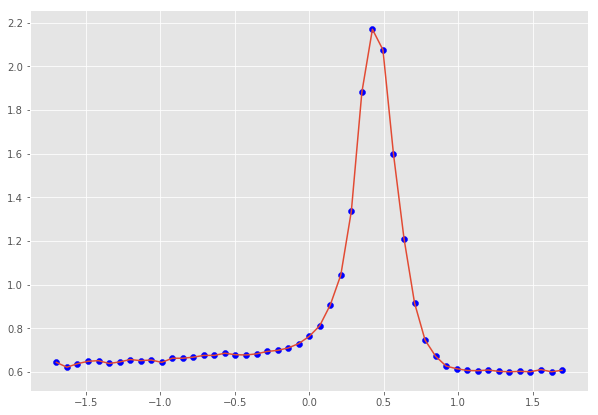

In [11]:
plt.figure(figsize=(10,7))
plt.scatter(X, y,color='blue')
plt.plot(X,y)

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Пусть `C = np.logspace(-2, 2, 10)`. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ каждого из ядер постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [12]:
from sklearn.metrics import mean_absolute_error

{'rbf': 100.0, 'linear': 0.01, 'poly': 0.01}


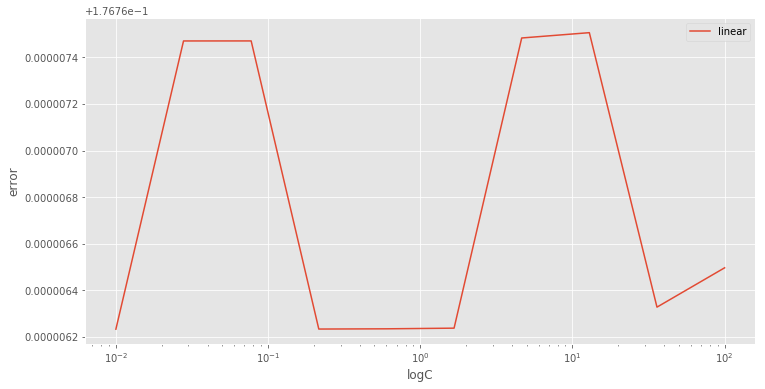

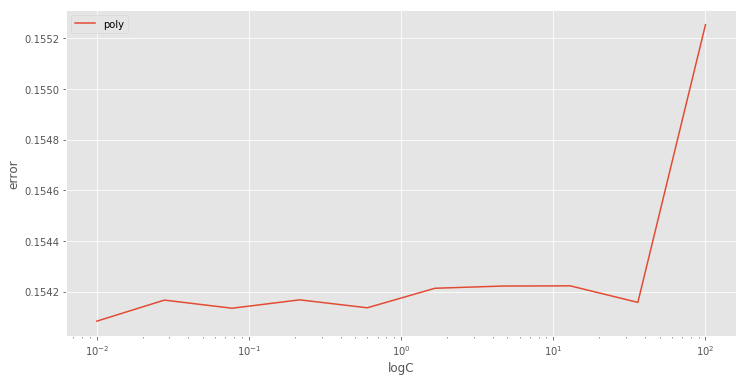

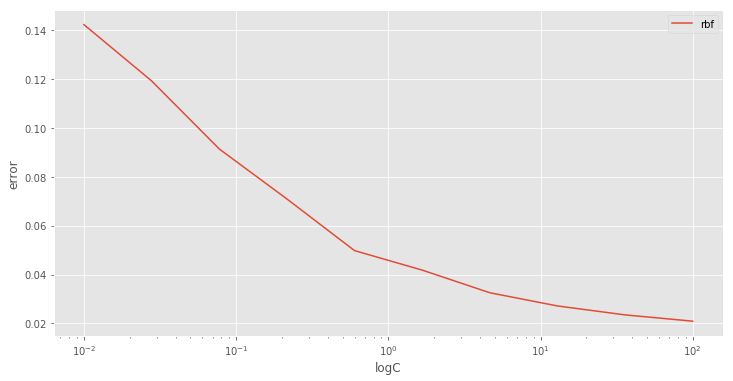

In [13]:
## Your Code Here
C = np.logspace(-2, 2, 10)
kernels = ['linear','poly','rbf']
best_C = dict()
error_list = []
for kernel in kernels:
    min_error = 1e+7
    for c in C:
        model = SVR(kernel=kernel, C=c, degree=3, gamma=6, coef0=1, epsilon=0.01)
        model.fit(X,y)
        y_pred = model.predict(X)
        temp_error = mean_absolute_error(y_true=y, y_pred=y_pred)
        error_list.append(temp_error)
        if temp_error < min_error:
            best_C.update({kernel:c})
            min_error = temp_error
    plt.subplots()
    plt.plot(C,error_list,label=str(kernel))
    plt.xscale('log')
    plt.xlabel(u'logC')
    plt.ylabel(u'error')
    error_list = []
    plt.legend()
print best_C

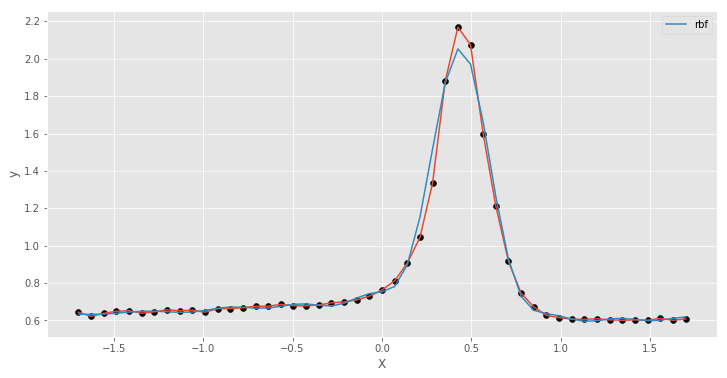

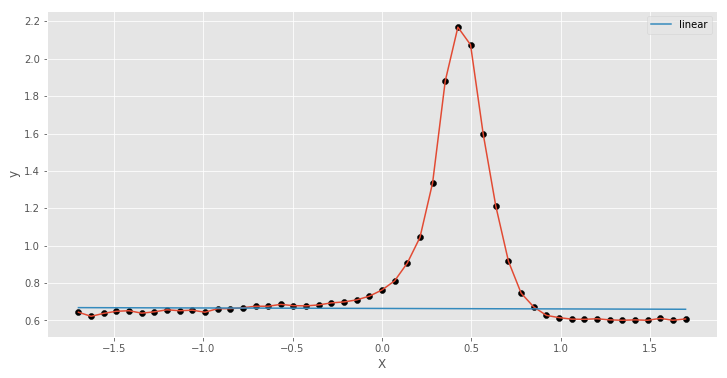

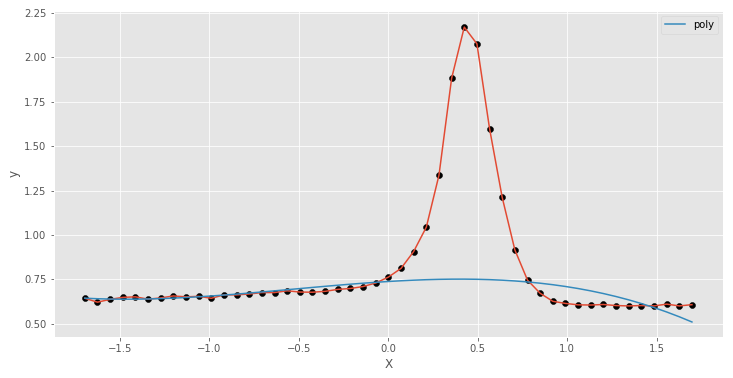

In [14]:
for kernel, value in best_C.iteritems():
    model = SVR(kernel=kernel, C=value, degree=3, gamma=6, coef0=1, epsilon=0.01)
    model.fit(X,y)
    y_pred = model.predict(X)
    plt.subplots()
    plt.scatter(X, y, color='black')
    plt.plot(X, y)
    plt.plot(X, y_pred, label=str(kernel))
    plt.xlabel(u'X')
    plt.ylabel(u'y')
    plt.legend()

В случае rbf возникает эффект переобучения.

В случае linear, poly возникает эффект недоучения.

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левинштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [15]:
file_es = open('war_and_peace_es.txt','r')
line_es = []
for line in file_es:
    line_es.append(line.rstrip('\n'))
file_es.close()
len(line_es)

6359

In [16]:
df_es = pd.DataFrame(line_es)
df_es.head()

,0
0,guerra
1,pace
2,lev
3,nicoevic
4,tolstj


In [17]:
df_es = df_es.rename(columns={0: 'word'})
df_es.head()

,word
0,guerra
1,pace
2,lev
3,nicoevic
4,tolstj


In [18]:
df_es = df_es.assign(label=0)
print df_es.shape
df_es.head()

(6359, 2)


,word,label
0,guerra,0
1,pace,0
2,lev,0
3,nicoevic,0
4,tolstj,0


In [19]:
file_en = open('war_and_peace_en.txt','r')
line_en = []
for line in file_en:
    line_en.append(line.rstrip('\n'))
file_en.close()
print len(line_en)
df_en = pd.DataFrame(line_en)
df_en = df_en.rename(columns={0: 'word'})
df_en = df_en.assign(label=1)
print df_en.shape
df_en.head()

5044
(5044, 2)


,word,label
0,war,1
1,and,1
2,peace,1
3,leo,1
4,tolstoy,1


In [20]:
data = pd.concat([df_es, df_en], ignore_index=True)
print data.shape
data.head()

(11403, 2)


,word,label
0,guerra,0
1,pace,0
2,lev,0
3,nicoevic,0
4,tolstj,0


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [21]:
from sklearn.cross_validation import train_test_split

In [22]:
RND_SEED = 1234

In [30]:
sample_data_full = data.sample(n=data.shape[0])
sample_data_full.head()

,word,label
3073,anzi,0
8037,did,1
9124,three,1
986,profonda,0
1057,per,0


In [31]:
sample_data_full = sample_data_full.reset_index()
sample_data_full.head()

,index,word,label
0,3073,anzi,0
1,8037,did,1
2,9124,three,1
3,986,profonda,0
4,1057,per,0


In [33]:
del sample_data_full['index']
sample_data_full.head()

,word,label
0,anzi,0
1,did,1
2,three,1
3,profonda,0
4,per,0


In [34]:
sample_data = sample_data_full[:3000]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(sample_data.index.values, sample_data['label'].values, test_size=0.4, random_state=RND_SEED)
print len(X_train)
print len(y_train)
print len(X_test)
print len(y_test)

1800
1800
1200
1200


## Расчет ядра (3 балла)

Некоторые указания по составлению пользовательского ядра можно найти [здесь](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

Если в двух словах:<br/>
Функция, реазлизующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во време обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).

В результате, функция должна возвращать матрицу ядра $G_{ij} = K(U_i, V_j)$.

Таким образом, в этом задании вам надо:
1. Написать функцию *string_kernel(U, V)*, расчитывающее матрицу ядра $G_{ij}$
2. Визуализировать матрицу только для обучающей выборки (функция plt.imshow()).

**ВАЖНО**<br/>
На лекции мы рассмотрели, что ядро должно обладать определенными свойствами, поэтому не получится рассчитать $G_{ij}$ как расстояние Левинштейна между словами $\text{word}_i$ и $\text{word}_j$.<br/>
Вместо этого используйте какое-нибудь готовое ядро, зависящее от расстояние между объектами.

In [36]:
import pylev

In [37]:
def string_kernel(U, V):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i, x1 in enumerate(U):
        for j, x2 in enumerate(V):
            G[i, j] = np.exp(-pylev.levenshtein(sample_data.word[x1], sample_data.word[x2])**2)
    return G

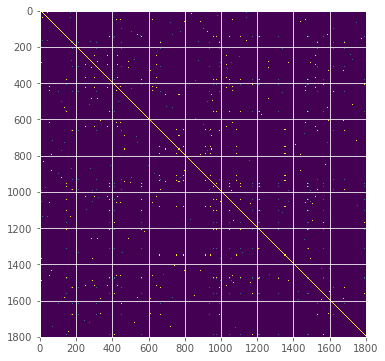

In [39]:
G = string_kernel(X_train, X_train)
plt.imshow(G)

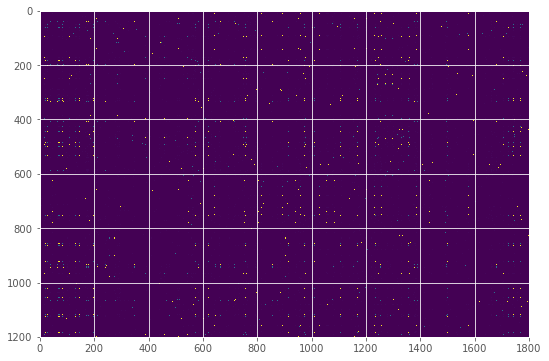

In [40]:
H = string_kernel(X_test, X_train)
plt.imshow(H)

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
#тест
scores = dict()
best_score = 0
for i in xrange(1000):
    c_ = float(i + 1) * .01
    clf = SVC(C=c_, kernel='precomputed')
    clf.fit(G, y_train)
    y_pred = clf.predict(H)
    score = accuracy_score(y_test, y_pred)
    scores[c_] = score
    if score > best_score:
        best_score = score
        best_c = c_
print "best_score", best_score
print "best_c", best_c

best_score 0.806666666667
best_c 1.76


In [43]:
scores

{0.25: 0.6925,
 0.5: 0.75,
 2.0: 0.80583333333333329,
 3.0: 0.80583333333333329,
 4.0: 0.80583333333333329,
 5.0: 0.80583333333333329,
 0.75: 0.79500000000000004,
 1.0: 0.8041666666666667,
 8.0: 0.80583333333333329,
 9.0: 0.80583333333333329,
 10.0: 0.80583333333333329,
 9.8: 0.80583333333333329,
 6.41: 0.80583333333333329,
 5.65: 0.80583333333333329,
 7.33: 0.80583333333333329,
 6.640000000000001: 0.80583333333333329,
 0.41000000000000003: 0.73166666666666669,
 8.9: 0.80583333333333329,
 9.040000000000001: 0.80583333333333329,
 7.17: 0.80583333333333329,
 6.0: 0.80583333333333329,
 6.98: 0.80583333333333329,
 1.17: 0.80500000000000005,
 0.23: 0.68583333333333329,
 5.2: 0.80583333333333329,
 7.0: 0.80583333333333329,
 9.72: 0.80583333333333329,
 3.29: 0.80583333333333329,
 7.01: 0.80583333333333329,
 7.4: 0.80583333333333329,
 6.82: 0.80583333333333329,
 8.32: 0.80583333333333329,
 8.44: 0.80583333333333329,
 7.75: 0.80583333333333329,
 8.46: 0.80583333333333329,
 7.74: 0.8058333333333

In [44]:
scores = dict()
best_score = 0
for i in xrange(1000):
    c_ = float(i + 1) * .01
    clf = SVC(C=c_, kernel='precomputed')
    clf.fit(G, y_train)
    y_pred = clf.predict(G)
    score = accuracy_score(y_train, y_pred)
    scores[c_] = score
    if score > best_score:
        best_score = score
        best_c = c_
print "best_score", best_score
print "best_c", best_c

best_score 0.986111111111
best_c 2.17


In [45]:
scores

{0.25: 0.75722222222222224,
 0.5: 0.84944444444444445,
 2.0: 0.98555555555555552,
 3.0: 0.98611111111111116,
 4.0: 0.98611111111111116,
 5.0: 0.98611111111111116,
 0.75: 0.98388888888888892,
 1.0: 0.98555555555555552,
 8.0: 0.98611111111111116,
 9.0: 0.98611111111111116,
 10.0: 0.98611111111111116,
 9.8: 0.98611111111111116,
 6.41: 0.98611111111111116,
 5.65: 0.98611111111111116,
 7.33: 0.98611111111111116,
 6.640000000000001: 0.98611111111111116,
 0.41000000000000003: 0.82999999999999996,
 8.9: 0.98611111111111116,
 9.040000000000001: 0.98611111111111116,
 7.17: 0.98611111111111116,
 6.0: 0.98611111111111116,
 6.98: 0.98611111111111116,
 1.17: 0.98555555555555552,
 0.23: 0.74722222222222223,
 5.2: 0.98611111111111116,
 7.0: 0.98611111111111116,
 9.72: 0.98611111111111116,
 3.29: 0.98611111111111116,
 7.01: 0.98611111111111116,
 7.4: 0.98611111111111116,
 6.82: 0.98611111111111116,
 8.32: 0.98611111111111116,
 8.44: 0.98611111111111116,
 7.75: 0.98611111111111116,
 8.46: 0.986111111111